## Pre Requisite

In [1]:
!pip install -q transformers==4.36.0
!pip install -q bitsandbytes==0.41.3 accelerate==0.25.0 diffusers==0.25.0
!pip install -U huggingface_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 79.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.3/330.3 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.20.1
    Uninstalling huggingface-hub-0.20.1:
      Successfully uninstalled huggingface-hub-0.20.1


In [2]:
from transformers import pipeline, BitsAndBytesConfig
from diffusers import AutoPipelineForText2Image
from PIL import Image
import requests
import torch
import json

In [3]:
def is_url(string):
  """Determines whether a string is a URL or a local directory.

  Args:
    string: The string to check.

  Returns:
    True if the string is a URL, False otherwise.
  """

  if string.startswith('http://') or string.startswith('https://'):
    return True
  else:
    return False

def load_image(dir_or_url):
  image_dir = dir_or_url

  if is_url(image_dir):
    image = Image.open(requests.get(image_dir, stream=True).raw)
  else:
    image = Image.open(image_dir)

  image = image.convert("RGB")
  return image

## Chain Run

In [4]:
# load in the models

device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

# llava (for img2text)
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

model_id = "llava-hf/llava-1.5-7b-hf"
llava_pipe = pipeline("image-to-text", model=model_id, model_kwargs={"quantization_config": quantization_config})

# sdxl-turbo (for text2img)
sdxl_pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16")
sdxl_pipe.to(device)

Device: cuda:0


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/954 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.25.0",
  "_name_or_path": "stabilityai/sdxl-turbo",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerAncestralDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

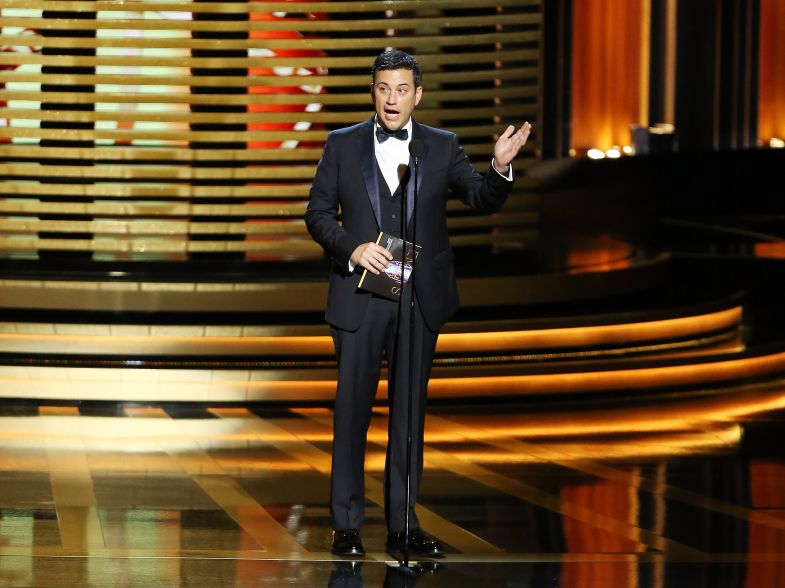

In [5]:
# load in the picture
# IMPORTANT: Image must only contain 1 person, best with entire body for better description

# Taylor Swift in Enchanted Gown
image = load_image("https://variety.com/wp-content/uploads/2023/03/enchanted.jpg?w=800")

# Taylor Swift in Public (1989 style)
# image = load_image("https://kiyosa-beauty.com/wp-content/uploads/2016/02/ts.jpg")

# Donald Trump (in Suits)
# image = load_image("https://static01.nyt.com/images/2019/09/10/opinion/10bruniWeb/10bruniWeb-superJumbo.jpg")

# Jack Sparrow (Pirate dress)
# image = load_image("https://i.pinimg.com/736x/6c/5d/9f/6c5d9fbaa38231088e7ae21a11915765.jpg")

# Jimmy Kimmel (Host dress)
# image = load_image("https://pagesix.com/wp-content/uploads/sites/3/2020/09/jimmy-kimmel-454195256.jpg?quality=80&strip=all&w=785")

image

In [6]:
# ask the model to get a description of the person in the image

llava_prompt = """
  USER: <image>\n
  Describe the person in the image only using short and precise keywords, separated by commas.\n
  Include the gender, hair style, skin color, the type and color of the outfits and accessories worn.
  ASSISTANT:
"""

outputs = llava_pipe(image, prompt=llava_prompt, generate_kwargs={"max_new_tokens": 50})
description = outputs[0]['generated_text']
description

'\n  USER:  \n\n  Describe the person in the image only using short and precise keywords, separated by commas.\n \n  Include the gender, hair style, skin color, the type and color of the outfits and accessories worn.\n  ASSISTANT:\n\n* Man\n* Black suit\n* Black tie\n* Black shoes\n* Black hair\n* White skin\n* Microphone\n* Award'

  0%|          | 0/2 [00:00<?, ?it/s]

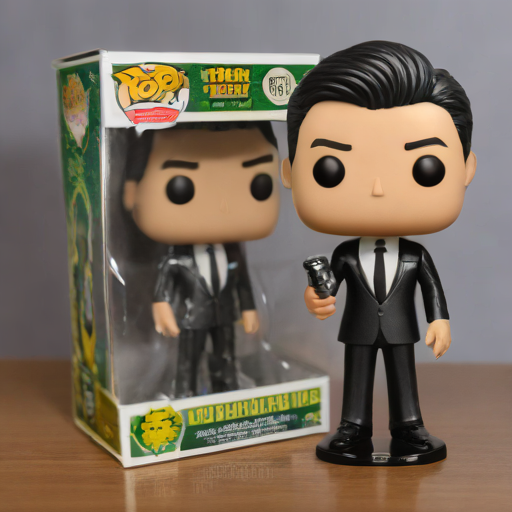

In [7]:
# ask the model to generate an image based on the description
name = "Jimmy"

cleaned_description = description.split('ASSISTANT:')[-1]

sdxl_prompt = f"""
Right-side, a Funko figure. On the left, the same figure inside Funko-themed box titled '{name}'.\n
3D rendition, shadow, studio background and lighting.\n
The figure description:\n {cleaned_description}
"""

# play around with the inference_step (ranging 1-4)
generated_image = sdxl_pipe(prompt=sdxl_prompt, num_inference_steps=2, guidance_scale=0.0).images[0]
generated_image

## Batch Run


In [11]:
input = [
    ['Taylor', 'https://variety.com/wp-content/uploads/2023/03/enchanted.jpg?w=800'],
    ['Taylor', 'https://kiyosa-beauty.com/wp-content/uploads/2016/02/ts.jpg'],
    ['Donald', 'https://static01.nyt.com/images/2019/09/10/opinion/10bruniWeb/10bruniWeb-superJumbo.jpg'],
    ['Jack', 'https://i.pinimg.com/736x/6c/5d/9f/6c5d9fbaa38231088e7ae21a11915765.jpg'],
    ['Jimmy', 'https://pagesix.com/wp-content/uploads/sites/3/2020/09/jimmy-kimmel-454195256.jpg?quality=80&strip=all&w=785'],
]

reporter = []

for l in input:
  img = load_image(l[1])
  desc_output = llava_pipe(img, prompt=llava_prompt, generate_kwargs={"max_new_tokens": 50})
  desc_input = desc_output[0]['generated_text'].split('ASSISTANT:')[-1]

  res = {
      'input_img': img.resize((512, 512)),
      'description': desc_input,
  }

  p = f"""
  Right-side, a Funko figure. On the left, the same figure inside Funko-themed box titled '{l[0]}'.\n
  3D rendition, shadow, studio background and lighting.\n
  The figure description:\n {desc_input}
  """

  for i in range(1, 4):
    img_output = sdxl_pipe(prompt=p, num_inference_steps=i, guidance_scale=0.0).images[0]
    res[f'step {i}'] = img_output

  reporter.append(res)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

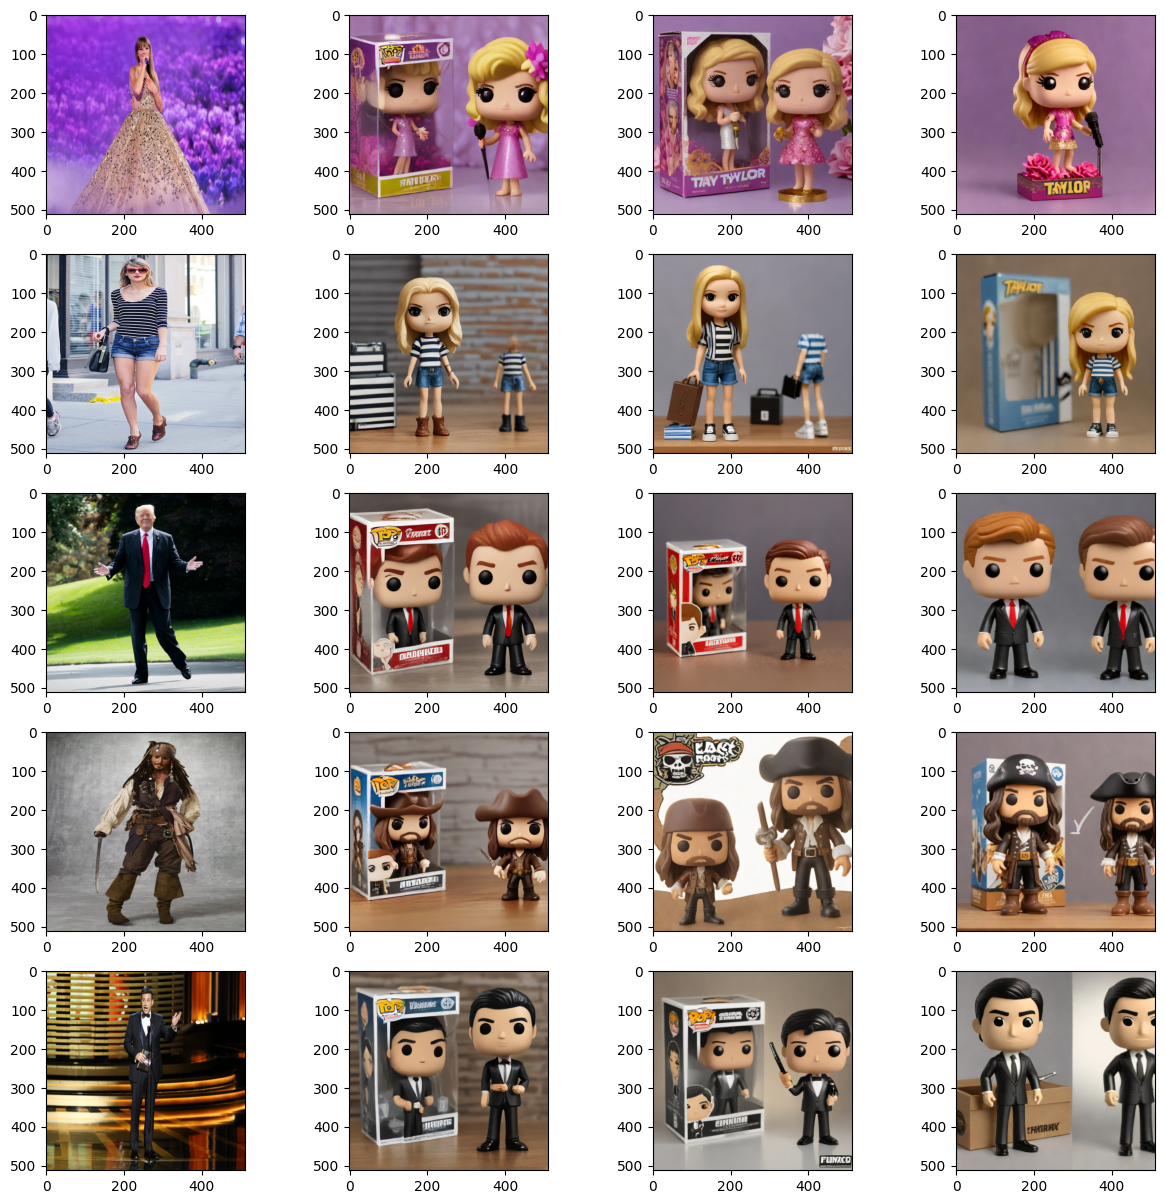

In [14]:
import matplotlib.pyplot as plt

f, axarr = plt.subplots(len(reporter), 4, figsize=(15, 15))
for i in range(0, len(reporter)):
  report = reporter[i]
  axarr[i, 0].imshow(report['input_img'])
  axarr[i, 1].imshow(report['step 1'])
  axarr[i, 2].imshow(report['step 2'])
  axarr[i, 3].imshow(report['step 3'])

In [15]:
reporter

[{'input_img': <PIL.Image.Image image mode=RGB size=512x512>,
  'description': '\n\n* Female\n* Blonde hair\n* White skin\n* Pink dress\n* Gold sequins\n* Purple flowers\n* Pink microphone',
  'step 1': <PIL.Image.Image image mode=RGB size=512x512>,
  'step 2': <PIL.Image.Image image mode=RGB size=512x512>,
  'step 3': <PIL.Image.Image image mode=RGB size=512x512>},
 {'input_img': <PIL.Image.Image image mode=RGB size=512x512>,
  'description': '\n\nWoman, blonde, blue jean shorts, black and white striped shirt, black purse, brown shoes.',
  'step 1': <PIL.Image.Image image mode=RGB size=512x512>,
  'step 2': <PIL.Image.Image image mode=RGB size=512x512>,
  'step 3': <PIL.Image.Image image mode=RGB size=512x512>},
 {'input_img': <PIL.Image.Image image mode=RGB size=512x512>,
  'description': '\n\n* Male\n* Short hair\n* White\n* Red tie\n* Black suit\n* Black jacket',
  'step 1': <PIL.Image.Image image mode=RGB size=512x512>,
  'step 2': <PIL.Image.Image image mode=RGB size=512x512>,
  

In [16]:
# To save the generated batch run, uncomment the line below
# f.savefig('./output/generated.jpg')